In [16]:
##import the primary librarys
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:

data=pd.read_csv('CAWa_CropType_time-series.csv')

In [4]:
data.sample(4)

,1,17,33,49,65,81,97,113,129,145,...,209,225,241,257,273,289,305,321,337,353
1179,0.369554,0.368068,0.308746,0.303223,0.342098,0.518992,0.685457,0.682361,0.616642,0.512034,...,0.525924,0.669930,0.640917,0.553100,0.366352,0.237644,0.152798,0.092783,0.056837,0.020890
1138,0.076210,0.064919,0.037145,0.046382,0.054262,0.084532,0.100908,0.158352,0.129709,0.110563,...,0.738896,0.777717,0.702988,0.492452,0.383409,0.313870,0.290002,0.238448,0.283200,0.302747
2134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.938441,0.764749,...,0.175454,0.190503,0.828853,0.696541,0.599631,0.502559,0.405488,NaN,NaN,NaN
8281,0.304297,0.297338,0.314787,0.379184,0.459879,0.576628,0.597129,0.589516,0.568221,0.539654,...,0.609102,0.534743,0.488902,0.570975,0.590895,0.516573,0.417415,0.370462,0.347239,0.324015


In [5]:
data.shape

(8435, 23)

In [36]:
data[columns]=data[columns].fillna(data[columns].mean())

In [37]:
data.isna().mean()*100

1      0.0
17     0.0
33     0.0
49     0.0
65     0.0
81     0.0
97     0.0
113    0.0
129    0.0
145    0.0
161    0.0
177    0.0
193    0.0
209    0.0
225    0.0
241    0.0
257    0.0
273    0.0
289    0.0
305    0.0
321    0.0
337    0.0
353    0.0
dtype: float64

In [31]:
columns=data.columns.to_list()

In [38]:
data.sample(2)

,1,17,33,49,65,81,97,113,129,145,...,209,225,241,257,273,289,305,321,337,353
4897,0.097924,0.094020,0.098795,0.102401,0.106007,0.093680,0.112969,0.125995,0.182436,0.186812,...,0.764263,0.745882,0.714089,0.558485,0.455644,0.387366,0.310505,0.320285,0.281931,0.211499
7230,0.193168,0.186573,0.126123,0.154597,0.178636,0.199143,0.277396,0.321595,0.356935,0.913804,...,0.104387,0.048477,0.261999,0.306599,0.685523,0.064561,-0.025288,-0.045310,0.055162,0.155635


In [39]:
data['label']=225

In [40]:
labels=data.iloc[:,-1]

In [43]:
data=data.drop('label',axis=1)

In [44]:
data.shape

(8435, 23)

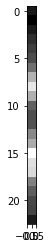

In [11]:
plt.imshow(data_1[10],cmap=plt.get_cmap('gray'))

In [57]:
import tensorflow
import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense,Activation,Conv1D,MaxPooling1D,Flatten,Dropout
from tensorflow.keras.optimizers import SGD

In [58]:
data.shape

(8435, 23)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [47]:
encoder=LabelEncoder()
encoder.fit(labels)
y_=encoder.transform(labels)
dummy_y=keras.utils.to_categorical(y_,num_classes=6)

In [78]:
X_train,X_test,y_train,y_test=train_test_split(data,dummy_y,test_size=0.1,random_state=42,shuffle=True)

In [79]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [56]:
seed=7
np.random.seed(seed)

In [63]:
model=Sequential()
model.add(Dense(250,activation='relu',input_shape=(23,)))
model.add(Dropout(0.5))
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 250)               6000      
                                                                 
 dropout_3 (Dropout)         (None, 250)               0         
                                                                 
 dense_5 (Dense)             (None, 150)               37650     
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 6)                 906       
                                                                 
Total params: 44,556
Trainable params: 44,556
Non-trainable params: 0
_________________________________________________________________


In [70]:
opt=keras.optimizers.Adadelta()
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [80]:
X_train.shape

(7591, 23)

In [83]:
y_pre=model.predict(X_test)

27/27 [==============================] - 0s 1ms/step


In [126]:
n_clases=6
model2=Sequential()
model2.add(Conv1D(kernel_size= n_clases, strides=1,filters= 32, activation='relu',input_shape=(23,1)))
print(model2.input_shape)
print(model2.output_shape)
model2.add(MaxPooling1D(pool_size=(2),strides=(2)))
print(model2.input_shape)
print(model2.output_shape)
model2.add(Conv1D(kernel_size= n_clases, strides=1, filters=64, activation='relu'))
model2.add(MaxPooling1D(pool_size= (2),strides=(2)))
print(model2.input_shape)
print(model2.output_shape)
model2.add(Flatten())
print(model2.output_shape)

model2.add(Dense(200,activation='relu'))
print(model2.output_shape)

model2.add(Dense(150,activation='relu'))
print(model2.output_shape)
print('######outptshape####')
model2.add(Dense(n_clases,activation='softmax'))
print(model2.output_shape)


(None, 23, 1)
(None, 18, 32)
(None, 23, 1)
(None, 9, 32)
(None, 23, 1)
(None, 2, 64)
(None, 128)
(None, 200)
(None, 150)
######outptshape####
(None, 6)


In [142]:
####compile#
model2.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(0.01),metrics=['accuracy'])

In [123]:
X1=np.expand_dims(X_train,axis=2)

In [125]:
X1.shape,y_train.shape

((7591, 23, 1), (7591, 6))

In [143]:
model2.fit(X1,y_train, epochs=10, batch_size=100)

Epoch 1/10
76/76 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/10
76/76 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
76/76 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
76/76 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
76/76 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
76/76 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
76/76 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
76/76 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
76/76 [==============================] - 0s 6ms/step - loss: 0.0000e+0

In [144]:
model2.evaluate(X_test,y_test)

27/27 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [145]:
X2=np.expand_dims(X_test,axis=2)

In [146]:
y_predict=model2.predict(X2)

27/27 [==============================] - 0s 2ms/step


In [81]:
model.fit(X_train,y_train,epochs=5,batch_size=100,verbose=2)

Epoch 1/5
76/76 - 0s - loss: 0.0737 - accuracy: 0.9996 - 398ms/epoch - 5ms/step
Epoch 2/5
76/76 - 0s - loss: 0.0731 - accuracy: 0.9996 - 285ms/epoch - 4ms/step
Epoch 3/5
76/76 - 0s - loss: 0.0699 - accuracy: 0.9997 - 264ms/epoch - 3ms/step
Epoch 4/5
76/76 - 0s - loss: 0.0708 - accuracy: 0.9996 - 223ms/epoch - 3ms/step
Epoch 5/5
76/76 - 0s - loss: 0.0690 - accuracy: 0.9999 - 238ms/epoch - 3ms/step


In [82]:
score=model.evaluate(X_test,y_test,batch_size=100)

9/9 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 1.0000
